# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [69]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [70]:
df = pd.read_csv("Datasets/Crimes_-_2001_to_present.csv", sep = ",")
print (df.head(5))
print (df.shape)

        ID Case Number                    Date                    Block  IUCR  \
0  4647776    HM172874  02/09/2006 10:29:07 PM       075XX S COLFAX AVE  1661   
1  4649196    HM157167  02/01/2006 12:30:27 PM     038XX W FERDINAND ST  1661   
2  4649661    HM159623  02/02/2006 07:02:12 PM      050XX W SUPERIOR ST  1661   
3  4650448    HM158020  02/01/2006 08:13:00 PM  056XX W WASHINGTON BLVD  1661   
4  4650940    HM156984  02/01/2006 10:10:00 AM          015XX W 72ND ST  1661   

  Primary Type Description     Location Description  Arrest  Domestic  \
0     GAMBLING   GAME/DICE                 SIDEWALK    True     False   
1     GAMBLING   GAME/DICE                 SIDEWALK    True     False   
2     GAMBLING   GAME/DICE                 SIDEWALK    True     False   
3     GAMBLING   GAME/DICE  RESIDENCE PORCH/HALLWAY    True     False   
4     GAMBLING   GAME/DICE                 SIDEWALK    True     False   

               ...                Ward  Community Area  FBI Code  \
0     

Get rid of any _rows_ that have nans in them:

In [71]:
df = df.dropna(axis=0)
print (df.shape)

(12920, 22)


Display the `dtypes` of your dset:

In [72]:
print (df.dtypes)

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object


Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [73]:
df.Date = df.Date = pd.to_datetime(df.Date, errors='coerce')
print (df.dtypes)

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object


In [74]:
def doKMeans(df_model):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df_model.Longitude, df_model.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    df_model = df_model[['Longitude','Latitude']]

    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    model = KMeans(n_clusters=7, init = 'random', max_iter = 400)
    model.fit(df_model)
    labels = model.predict(df_model)


    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.71222745  41.87476344]
 [-87.67671086  41.96816971]
 [-87.66494055  41.77578053]
 [-87.58025344  41.7505474 ]
 [-87.75513125  41.89014513]
 [-87.63500787  41.70540614]
 [-87.61913725  41.79183807]]


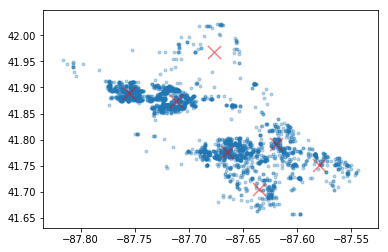

In [85]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [79]:
df = df.ix[(df['Date'] > '2011-01-01')]

             ID Case Number                Date  \
0       4647776    HM172874 2006-02-09 22:29:07   
1       4649196    HM157167 2006-02-01 12:30:27   
2       4649661    HM159623 2006-02-02 19:02:12   
3       4650448    HM158020 2006-02-01 20:13:00   
4       4650940    HM156984 2006-02-01 10:10:00   
5       4651151    HM161364 2006-02-03 16:40:00   
6       4656683    HM161437 2006-02-03 16:30:00   
7       4656759    HM161911 2006-02-03 20:00:00   
8       4657274    HM159750 2006-02-02 19:30:00   
9       4657315    HM159804 2006-02-02 18:50:00   
10      4660220    HM259820 2006-03-29 15:35:00   
11      4662776    HM168656 2006-02-07 17:20:00   
12      4663539    HM166553 2006-02-06 15:18:40   
13      4663794    HM263708 2006-03-31 13:00:00   
14      4667660    HM172239 2006-02-09 15:45:24   
15      4668207    HM146972 2006-01-26 22:05:00   
16      4669202    HM168718 2006-02-07 17:50:00   
17      4669446    HM170157 2006-02-08 14:15:00   
18      4669852    HM174694 200

[[-87.66494055  41.77578053]
 [-87.7547743   41.88991826]
 [-87.7104034   41.87539657]
 [-87.61913725  41.79183807]
 [-87.58025344  41.7505474 ]
 [-87.68654787  41.98439273]
 [-87.63500787  41.70540614]]


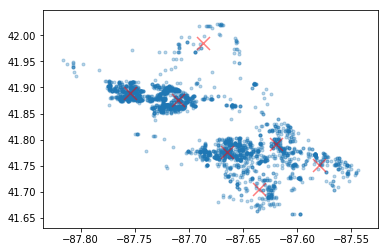

In [88]:
# Print & Plot your data
doKMeans(df)